In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"C:\Users\pc\Documents\python internshala\Housing Price.csv")

In [4]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


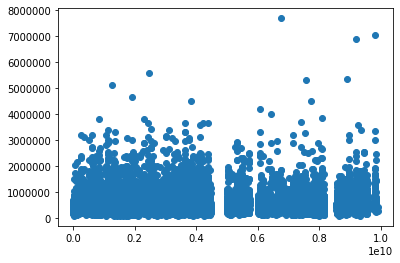

In [5]:
plt.scatter(x=df['ID'], y=df['Sale Price'])

# # Data exploration:target variable(sale price)

df['Sale Price'].describe()

In [6]:
df['Sale Price'].tail(10)        #eyeballing of outliers

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

In [7]:
df['Sale Price'].head(10)        #eyeballing of outliers

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

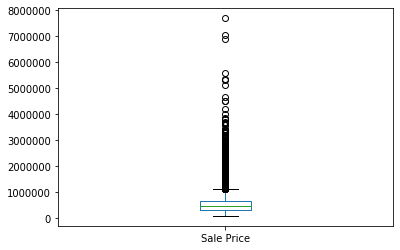

In [8]:
df['Sale Price'].plot.box()         #matplotlib doesn't ignore missing values

In [9]:
#using seaborn to ignore missing values
import seaborn as sns

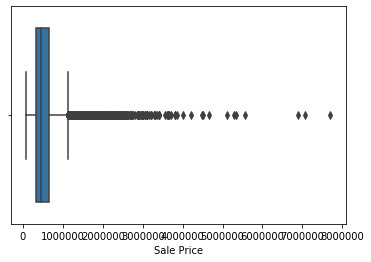

In [10]:
sns.boxplot(x=df['Sale Price'])

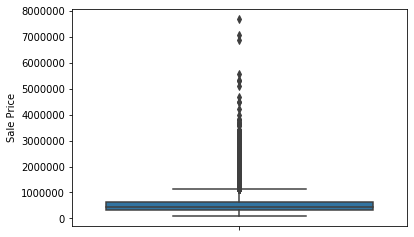

In [11]:
sns.boxplot(y=df['Sale Price'])

In [12]:
q1=df['Sale Price'].quantile(0.25)
q3=df['Sale Price'].quantile(0.75)

In [13]:
IQR= q3-q1

In [14]:
IQR

323050.0

In [15]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [16]:
upper_limit

1129575.0

In [17]:
lower_limit

-162625.0

In [18]:
#imputing outliers with the limit values
#define a limit function
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [19]:
df['Sale Price']=df['Sale Price'].apply(limit_imputer)

In [20]:
#validate outliers are treated or not
df['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
ID                                           21613 non-null int64
Date House was Sold                          21613 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21613 non-null int64
No of Bathrooms                              21609 non-null float64
Flat Area (in Sqft)                          21604 non-null float64
Lot Area (in Sqft)                           21604 non-null float64
No of Floors                                 21613 non-null float64
Waterfront View                              21613 non-null object
No of Times Visited                          21613 non-null object
Condition of the House                       21613 non-null object
Overall Grade                                21613 non-null int64
Area of the House from Basement (in Sqft)    21610 non-null float64
Basement Area (in

In [22]:
df.dropna(subset=['Sale Price'], inplace=True, axis=0)

In [23]:
df.info()            #21613 becomes 21609 -removed missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
ID                                           21609 non-null int64
Date House was Sold                          21609 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21609 non-null int64
No of Bathrooms                              21605 non-null float64
Flat Area (in Sqft)                          21600 non-null float64
Lot Area (in Sqft)                           21600 non-null float64
No of Floors                                 21609 non-null float64
Waterfront View                              21609 non-null object
No of Times Visited                          21609 non-null object
Condition of the House                       21609 non-null object
Overall Grade                                21609 non-null int64
Area of the House from Basement (in Sqft)    21606 non-null float64
Basement Area (in

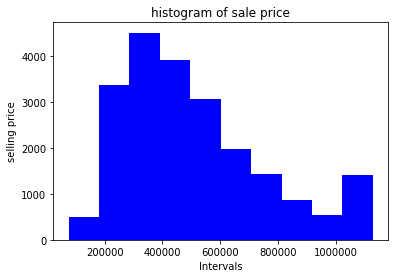

In [24]:
#Histogram is skewed towards lower sides

plt.hist(df['Sale Price'], bins=10, color='blue')
plt.xlabel('Intervals')
plt.ylabel('selling price')
plt.title('histogram of sale price')
plt.show()

# Data exploration:Independent numeric variable(latitude)

In [25]:
len(df['Latitude'].unique())

5034

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
ID                                           21609 non-null int64
Date House was Sold                          21609 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21609 non-null int64
No of Bathrooms                              21605 non-null float64
Flat Area (in Sqft)                          21600 non-null float64
Lot Area (in Sqft)                           21600 non-null float64
No of Floors                                 21609 non-null float64
Waterfront View                              21609 non-null object
No of Times Visited                          21609 non-null object
Condition of the House                       21609 non-null object
Overall Grade                                21609 non-null int64
Area of the House from Basement (in Sqft)    21606 non-null float64
Basement Area (in

In [27]:
#taking all numerical column which has not 21609 rows
numerical_columns=['No of Bathrooms', 'Latitude', 'Longitude', 
                   'Area of the House from Basement (in Sqft)',
                   'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'Living Area after Renovation (in Sqft)' ]

In [28]:
from sklearn.impute import SimpleImputer
imputer=(SimpleImputer(missing_values=np.nan, strategy='median',))
df[numerical_columns]=imputer.fit_transform(df[numerical_columns])

In [29]:
df.info()           #zipcode(cat var) still have missing value 21608

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
ID                                           21609 non-null int64
Date House was Sold                          21609 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21609 non-null int64
No of Bathrooms                              21609 non-null float64
Flat Area (in Sqft)                          21609 non-null float64
Lot Area (in Sqft)                           21609 non-null float64
No of Floors                                 21609 non-null float64
Waterfront View                              21609 non-null object
No of Times Visited                          21609 non-null object
Condition of the House                       21609 non-null object
Overall Grade                                21609 non-null int64
Area of the House from Basement (in Sqft)    21609 non-null float64
Basement Area (in

In [30]:
imputer=(SimpleImputer(missing_values=np.nan, strategy='most_frequent',))
df['Zipcode']=imputer.fit_transform(df['Zipcode'])

ValueError: Expected 2D array, got 1D array instead:
array=[98178. 98125. 98028. ... 98144. 98027. 98144.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#2d array error:check data shape 
df['Zipcode'].shape              #it is 1d array

In [ ]:
#reshape 1d to 2d array
column=df['Zipcode'].values.reshape(-1,1)          #-1 takes all rows by default
column.shape

# Variable transformation

In [ ]:
#converting zipcode variable type into categorical type
df['Zipcode']=df['Zipcode'].astype(object)

In [ ]:
#check zipcode datatype converted from float64 to object
df.info()

In [ ]:
#transform categorical to numerical
#check all unique values
df['No of Times Visited'].unique()

In [ ]:
mapping={'None':'0',
         'Once':'1',
         'Twice':'2',
         'Thrice':'3',
         'Four':'4'}

In [ ]:
df.head()

In [ ]:
#new var from a var
#add new column ever renovated
df['Ever Renovated']=np.where(df['Renovated Year']==0, 'no', 'yes')

In [ ]:
df.head()

In [ ]:
#use date house was sold to fetch year and purchase year
#use purchase year and renovated year to get years since renovation done
df['Purchase Year']=pd.DatetimeIndex(df['Date House was Sold']).year
df['Years Since Renovation']=np.where(df['Ever Renovated']=='yes',
                                     abs(df['Purchase Year']- df['Renovated Year']),0)

In [ ]:
df.head()

In [ ]:
#drop purchase year, renovatec year, date house was sold to make data clean
df.drop(columns=['Purchase Year', 'Renovated Year', 'Date House was Sold'], inplace=True)

In [31]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
